In [1]:
import numpy as np
import os as os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [2]:
print(tf.config.list_physical_devices('GPU'))

[]


In [3]:
categories=['angry','fearful','happy','sad','surprised']

In [4]:
training_data=[]

DataDir='emotionrecogapp/train'
def data_load():
    for category in categories:
        path = os.path.join(DataDir, category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            img_array=cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
            new_array=cv.resize(img_array,(48,48))
            training_data.append([new_array,class_num])
    x=[]
    y=[]
    for features, label in training_data:
        x.append(features)
        y.append(label)

    x=np.array(x).reshape(-1,48,48,1)
    y=np.array(y)
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)
    
    return x_train,x_test,y_train,y_test

In [8]:
x_train.shape

(12004, 48, 48, 1)

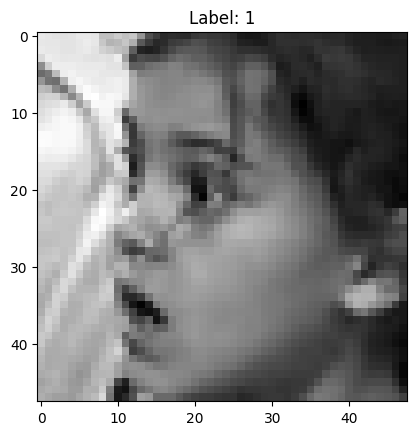

In [9]:
import matplotlib.pyplot as plt

# Display the first image and its corresponding label
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [10]:
x_train,x_test=x_train/255,x_test/255

In [12]:
#T4


model = models.Sequential([
    layers.Conv2D(64, (2,2), activation='relu', input_shape=(48,48,1)),
    layers.BatchNormalization(),
    
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.BatchNormalization(),    
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(128, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(256, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(256, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    
    layers.Conv2D(512, (2,2), activation='relu',padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Dense(6, activation='softmax')
])

c:\Users\aakan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 47, 47, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 23, 23, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 256)    │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 256)    │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             

 Total params: 6,433,670 (24.54 MB)

 Trainable params: 6,425,222 (24.51 MB)

 Non-trainable params: 8,448 (33.00 KB)

In [19]:
model=keras.models.load_model('t5.h5')

In [20]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(x_train)

In [22]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [28]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_reduce, early_stopping])

Epoch 1/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 309s 822ms/step - accuracy: 0.6859 - loss: 0.8009 - val_accuracy: 0.6671 - val_loss: 0.8363 - learning_rate: 2.5000e-04
Epoch 2/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 341s 906ms/step - accuracy: 0.6936 - loss: 0.7767 - val_accuracy: 0.6711 - val_loss: 0.8433 - learning_rate: 2.5000e-04
Epoch 3/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 340s 903ms/step - accuracy: 0.6919 - loss: 0.7733 - val_accuracy: 0.6678 - val_loss: 0.8282 - learning_rate: 2.5000e-04
Epoch 4/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 330s 878ms/step - accuracy: 0.6936 - loss: 0.7777 - val_accuracy: 0.6671 - val_loss: 0.8472 - learning_rate: 2.5000e-04
Epoch 5/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 236s 627ms/step - accuracy: 0.6915 - loss: 0.7668 - val_accuracy: 0.6671 - val_loss: 0.8299 - learning_rate: 2.5000e-04
Epoch 6/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 223s 592ms/step - accuracy: 0.7011 - loss: 0.7709 - val_accuracy: 0.6718 - val_loss: 0.8218 - learning_rate: 2.5000e-04
Epoch 7/20
376/376 ━━━━━━━━━━━━━━━━━━━━ 

KeyboardInterrupt: 

In [25]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print(test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.6651 - loss: 0.8487
0.6631122827529907


In [27]:
model.save('t4.h5')